In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("diabetes.csv")  # Ensure the file is in the same directory

# Split dataset into two classes based on Outcome (0 = No Diabetes, 1 = Diabetes)
class_0 = df[df["Outcome"] == 0].drop(columns=["Outcome"])  # Class 0 (No Diabetes)
class_1 = df[df["Outcome"] == 1].drop(columns=["Outcome"])  # Class 1 (Diabetes)

# Compute class centroids (mean vectors)
centroid_0 = np.mean(class_0, axis=0)
centroid_1 = np.mean(class_1, axis=0)

# Compute class spreads (standard deviation vectors)
spread_0 = np.std(class_0, axis=0)
spread_1 = np.std(class_1, axis=0)

# Compute interclass distance (Euclidean distance between centroids)
interclass_distance = np.linalg.norm(centroid_0 - centroid_1)

# Print results
print("Class 0 (No Diabetes) Centroid:\n", centroid_0)
print("\nClass 1 (Diabetes) Centroid:\n", centroid_1)
print("\nClass 0 (No Diabetes) Spread (Std Dev):\n", spread_0)
print("\nClass 1 (Diabetes) Spread (Std Dev):\n", spread_1)
print("\nInterclass Distance (Euclidean):", interclass_distance)


Class 0 (No Diabetes) Centroid:
 Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
dtype: float64

Class 1 (Diabetes) Centroid:
 Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
dtype: float64

Class 0 (No Diabetes) Spread (Std Dev):
 Pregnancies                  3.014166
Glucose                     26.115045
BloodPressure               18.045003
SkinThickness               14.875050
Insulin                     98.766375
BMI                          7.682161
DiabetesPedi

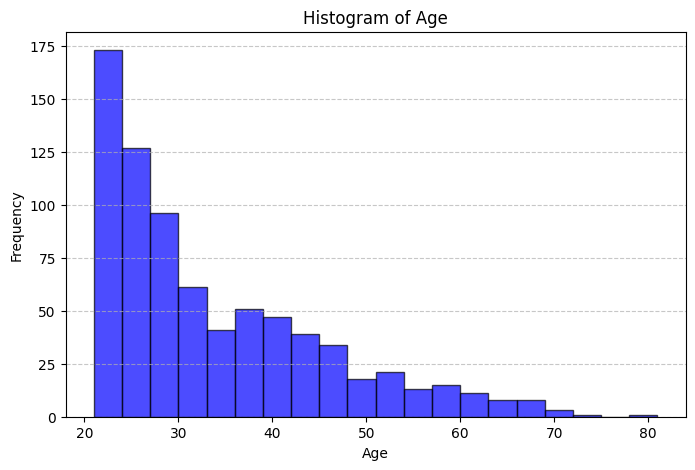

Mean of Age: 33.240885416666664
Variance of Age: 138.12296379937058


In [ ]:

# Select a feature (e.g., Glucose) and plot histogram
feature = "Age"
plt.figure(figsize=(8, 5))
plt.hist(df[feature], bins=20, alpha=0.7, color="blue", edgecolor="black")
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.title(f"Histogram of {feature}")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Compute mean and variance
mean_feature = np.mean(df[feature])
variance_feature = np.var(df[feature])

print(f"Mean of {feature}: {mean_feature}")
print(f"Variance of {feature}: {variance_feature}")


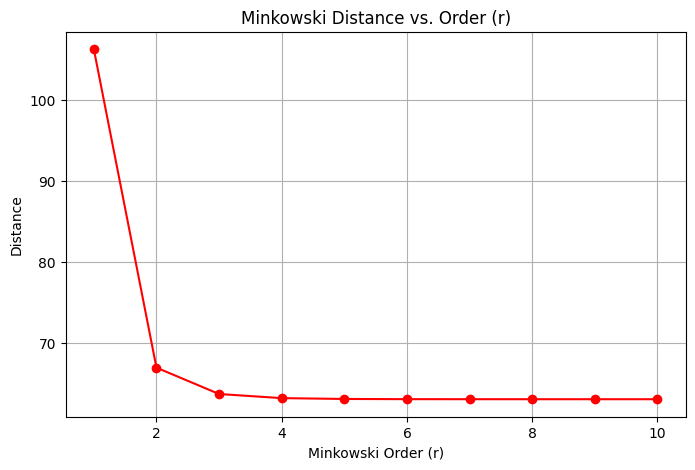

Minkowski Distance (r=1): 106.276
Minkowski Distance (r=2): 66.90348403483932
Minkowski Distance (r=3): 63.64500896666514
Minkowski Distance (r=4): 63.135475834363135
Minkowski Distance (r=5): 63.031854892625496
Minkowski Distance (r=6): 63.00793628937846
Minkowski Distance (r=7): 63.00204550755451
Minkowski Distance (r=8): 63.00053924384834
Minkowski Distance (r=9): 63.00014450922644
Minkowski Distance (r=10): 63.00003921923464


In [ ]:
from scipy.spatial.distance import minkowski
import matplotlib.pyplot as plt

# Select two feature vectors (first two rows)
vec1 = df.iloc[0, :-1].values
vec2 = df.iloc[1, :-1].values

# Compute Minkowski distance for r = 1 to 10
r_values = list(range(1, 11))
minkowski_distances = [minkowski(vec1, vec2, r) for r in r_values]

# Plot Minkowski distances
plt.figure(figsize=(8, 5))
plt.plot(r_values, minkowski_distances, marker='o', linestyle='-', color='red')
plt.xlabel("Minkowski Order (r)")
plt.ylabel("Distance")
plt.title("Minkowski Distance vs. Order (r)")
plt.grid(True)
plt.show()

# Print distances for reference
for r, d in zip(r_values, minkowski_distances):
    print(f"Minkowski Distance (r={r}): {d}")


In [ ]:


# Define features (X) and target variable (y)
X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target variable

# Split dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 537 samples
Testing set size: 231 samples


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train k-NN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("k-NN Classifier (k=3) trained successfully!")


k-NN Classifier (k=3) trained successfully!


In [ ]:
# Compute test accuracy
accuracy = knn.score(X_test, y_test)
print("Test Accuracy (k=3):", accuracy)


Test Accuracy (k=3): 0.6753246753246753


In [ ]:
# Predict labels for the test set
y_pred = knn.predict(X_test)

# Print predictions
print("Predictions on test data:\n", y_pred)


Predictions on test data:
 [0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0 0]


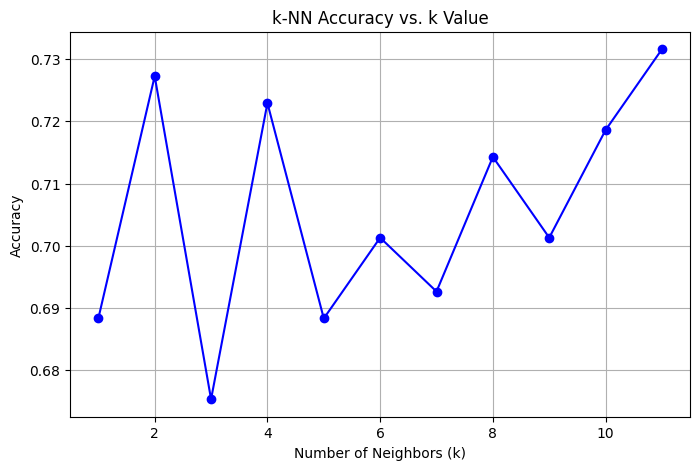

In [ ]:
k_values = list(range(1, 12))
accuracies = []

# Train k-NN classifiers for different values of k and compute accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plot Accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("k-NN Accuracy vs. k Value")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)

# Print precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Confusion Matrix:
 [[108  43]
 [ 32  48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74       151
           1       0.53      0.60      0.56        80

    accuracy                           0.68       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.68      0.68       231

